In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, f1_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay

try:
    df1 = pd.read_csv("mxmh_survey_results.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: The CSV file was not found at the specified path.")
    print("Please ensure 'mxmh_survey_results.csv' is in the correct directory.")
    exit()



Dataset loaded successfully.


In [ ]:
df1.columns = df1.columns.str.strip()

print("\nData Information")
df1.info()

print("\nFirst 20 Rows of the Dataset")
print(df1.head(20).to_string())

print("\nRaw 'Music effects' unique values and counts before cleaning")
print(df1['Music effects'].unique())
print(df1['Music effects'].value_counts())



Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    

In [ ]:
df1.isnull().sum()

,0
Timestamp,0
Age,1
Primary streaming service,1
Hours per day,0
While working,3
Instrumentalist,4
Composer,1
Fav genre,0
Exploratory,0
Foreign languages,4


In [ ]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='median')
df1[['Age']] = num_imputer.fit_transform(df1[['Age']])

num_imputer = SimpleImputer(strategy='mean')
df1[['BPM']] = num_imputer.fit_transform(df1[['BPM']])

cat_imputer = SimpleImputer(strategy='most_frequent')
df1[['Primary streaming service']] = cat_imputer.fit_transform(df1[['Primary streaming service']])

cat_imputer = SimpleImputer(strategy='most_frequent')
df1[['Music effects']] = cat_imputer.fit_transform(df1[['Music effects']])


cat_imputer = SimpleImputer(strategy='most_frequent')
df1[['While working']] = cat_imputer.fit_transform(df1[['While working']])


cat_imputer = SimpleImputer(strategy='most_frequent')
df1[['Foreign languages']] = cat_imputer.fit_transform(df1[['Foreign languages']])

df1 = df1.dropna(subset=['Instrumentalist'])
df1 = df1.dropna(subset=['Composer'])


In [ ]:
df1.isnull().sum()

,0
Timestamp,0
Age,0
Primary streaming service,0
Hours per day,0
While working,0
Instrumentalist,0
Composer,0
Fav genre,0
Exploratory,0
Foreign languages,0


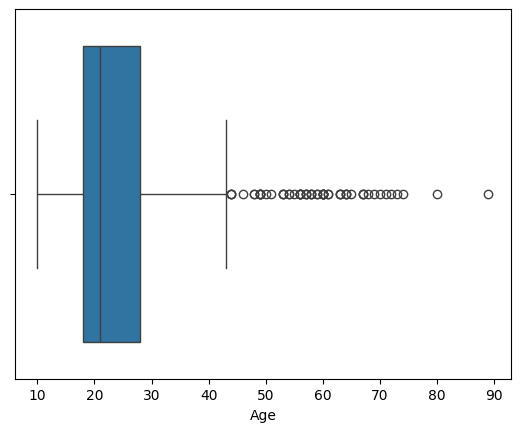

In [ ]:
#implementing a boxplot
sns.boxplot(x=df1['Age'])

#we have to get rid of outliers since this data does not accurately represent out population,
# it goes up to 90 which is wayyy larger than the natural distribution which ends at 45

Q1 = df1['Age'].quantile(0.25)
Q3 = df1['Age'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df1_clean = df1[(df1['Age'] >= lower) & (df1['Age'] <= upper)]

<Axes: xlabel='Age'>

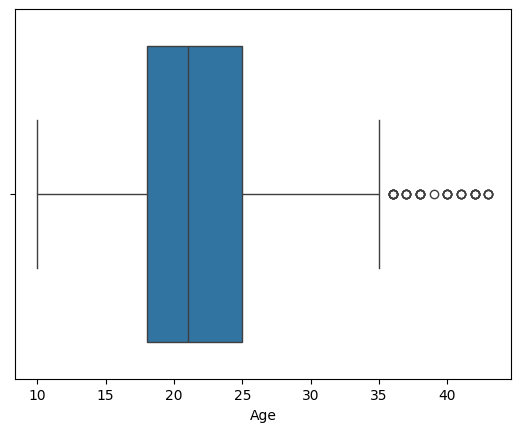

In [ ]:
sns.boxplot(x=df1_clean['Age'])

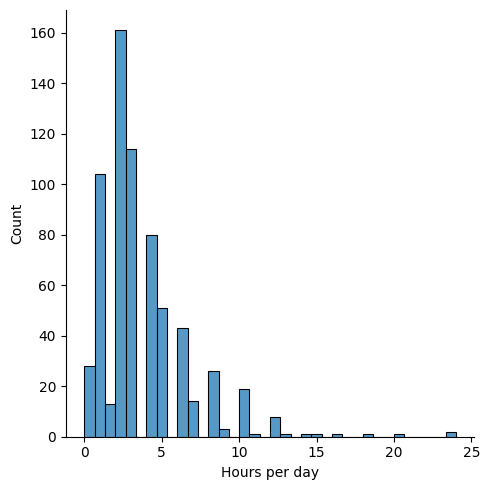

In [ ]:
sns.displot(df1_clean['Hours per day'])

In [ ]:
percentile25= df1_clean['Hours per day'].quantile(0.25)
percentile75= df1_clean['Hours per day'].quantile(0.75)

print(percentile25, percentile75)

IQR= percentile75-percentile25
print(IQR)

upper_limit=percentile75 + 1.5*IQR
lower_limit=percentile25 - 1.5*IQR

print(upper_limit, lower_limit)

2.0 5.0
3.0
9.5 -2.5


In [ ]:
#finding outliers

df1_clean[(df1_clean['Hours per day']>upper_limit) | (df1_clean['Hours per day']<lower_limit)]

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
17,8/27/2022 23:39:49,16.0,Spotify,12.0,Yes,No,Yes,Hip hop,Yes,Yes,...,Rarely,Sometimes,Very frequently,Never,5.0,7.0,10.0,0.0,Improve,I understand.
18,8/27/2022 23:40:55,17.0,Spotify,24.0,Yes,No,No,Rap,Yes,No,...,Sometimes,Very frequently,Very frequently,Never,7.0,5.0,0.0,3.0,Improve,I understand.
26,8/28/2022 4:40:36,14.0,Spotify,12.0,Yes,Yes,Yes,Rock,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Sometimes,8.0,6.0,10.0,5.0,Improve,I understand.
53,8/28/2022 12:53:01,23.0,Spotify,12.0,Yes,No,No,Pop,Yes,Yes,...,Sometimes,Rarely,Rarely,Never,3.0,7.0,5.0,5.0,No effect,I understand.
77,8/28/2022 14:08:57,19.0,Spotify,10.0,Yes,No,No,R&B,Yes,Yes,...,Very frequently,Rarely,Never,Never,7.0,2.0,1.0,5.0,Improve,I understand.
95,8/28/2022 14:59:05,22.0,Spotify,10.0,Yes,No,No,Metal,Yes,Yes,...,Never,Rarely,Sometimes,Sometimes,9.0,6.0,0.0,6.0,Improve,I understand.
125,8/28/2022 17:15:18,22.0,Spotify,10.0,No,Yes,Yes,EDM,No,Yes,...,Rarely,Never,Sometimes,Sometimes,4.0,7.0,7.0,3.0,Improve,I understand.
142,8/28/2022 18:13:47,27.0,Spotify,10.0,Yes,No,No,Metal,Yes,Yes,...,Rarely,Sometimes,Very frequently,Rarely,5.0,6.0,6.0,3.0,Improve,I understand.
164,8/28/2022 19:04:26,27.0,Spotify,10.0,Yes,No,No,Metal,Yes,Yes,...,Sometimes,Sometimes,Very frequently,Sometimes,8.0,8.0,3.0,0.0,Improve,I understand.
257,8/29/2022 0:05:09,21.0,Spotify,10.0,Yes,No,No,Metal,Yes,Yes,...,Sometimes,Very frequently,Very frequently,Sometimes,9.0,10.0,2.0,2.0,No effect,I understand.


In [ ]:
#applying capping

new_df=df1_clean.copy()

new_df['Hours per day']=np.where(new_df['Hours per day']>upper_limit, upper_limit, np.where(new_df['Hours per day']<lower_limit, lower_limit, new_df['Hours per day']))

new_df.shape

(673, 33)

<Axes: xlabel='Hours per day'>

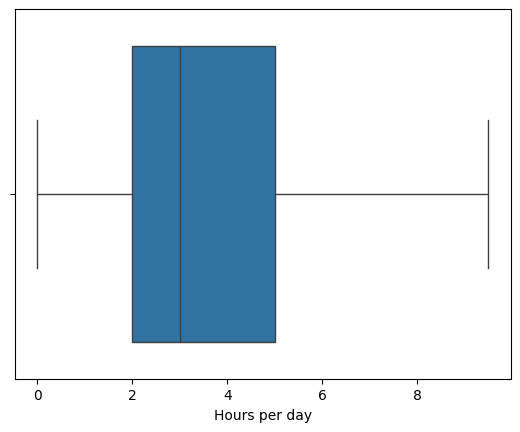

In [ ]:
sns.boxplot(data=new_df, x='Hours per day')

Exploratory Data Analysis (EDA)


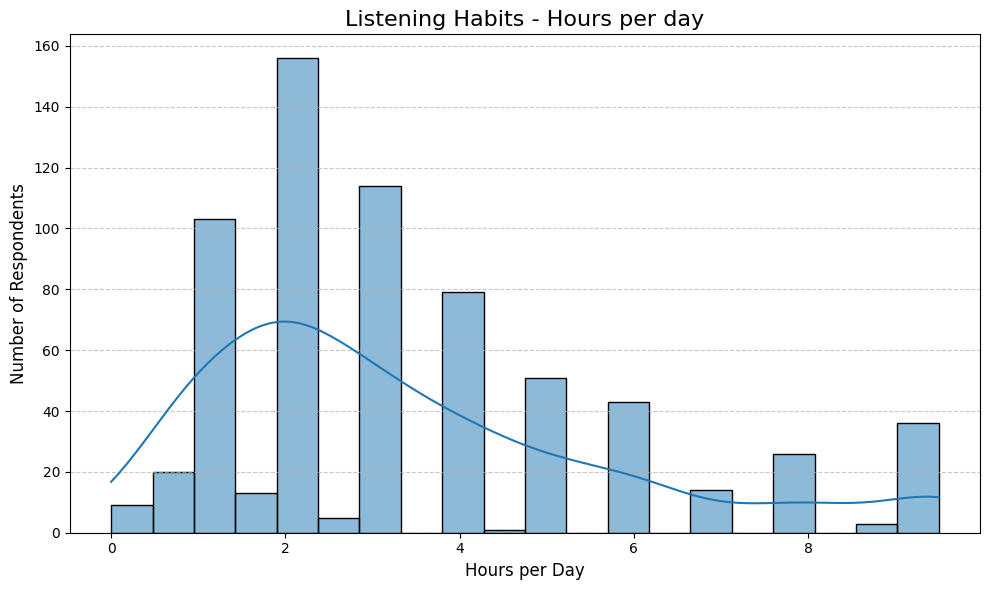

In [ ]:
# Histogram for 'Hours per day'
if 'Hours per day' in new_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=new_df, x='Hours per day', kde=True, bins=20)
    plt.title('Listening Habits - Hours per day', fontsize=16)
    plt.xlabel('Hours per Day', fontsize=12)
    plt.ylabel('Number of Respondents', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("'Hours per day' column not found for EDA.")

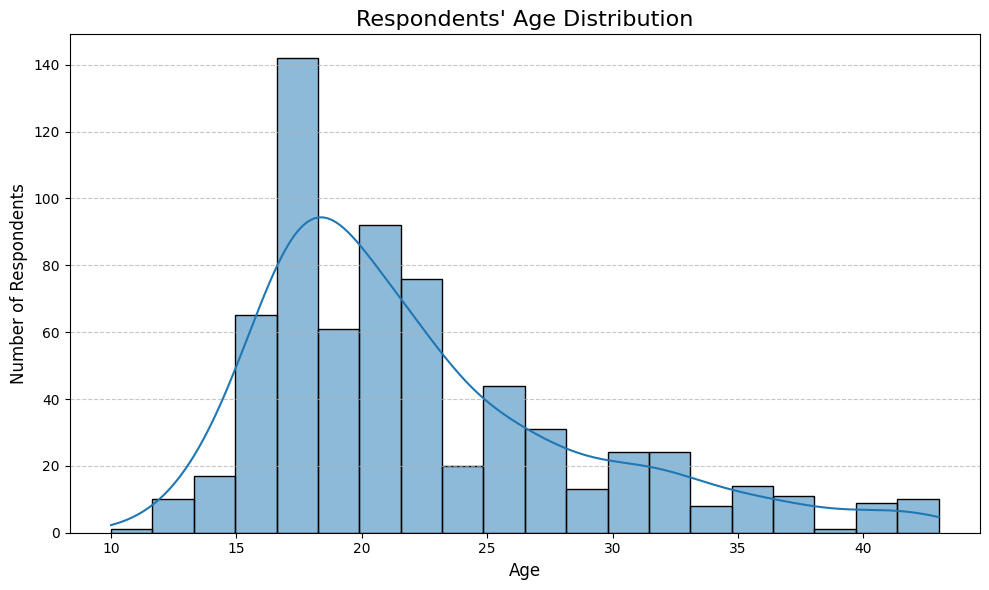

In [ ]:
# Histogram for 'Age'
if 'Age' in new_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=new_df, x='Age', kde=True, bins=20)
    plt.title("Respondents' Age Distribution", fontsize=16)
    plt.xlabel('Age', fontsize=12)
    plt.ylabel('Number of Respondents', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("'Age' column not found for EDA.")


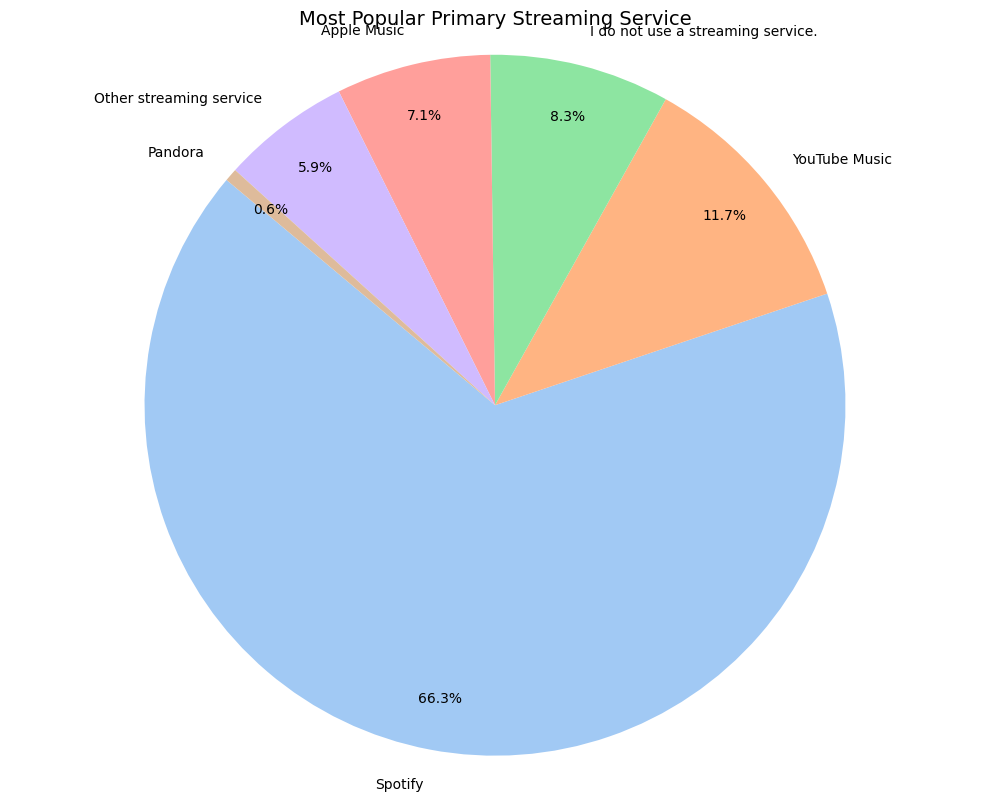

In [ ]:

# Pie chart for 'Primary streaming service'
df_streaming_servies = new_df['Primary streaming service'].value_counts().reset_index()
palette_color = sns.color_palette('pastel')[0:len(df_streaming_servies)]

plt.figure(figsize=(10, 8))
plt.pie(df_streaming_servies['count'], labels=df_streaming_servies['Primary streaming service'],
        colors=palette_color, autopct='%.1f%%', startangle=140, pctdistance=0.85)
plt.title('Most Popular Primary Streaming Service', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

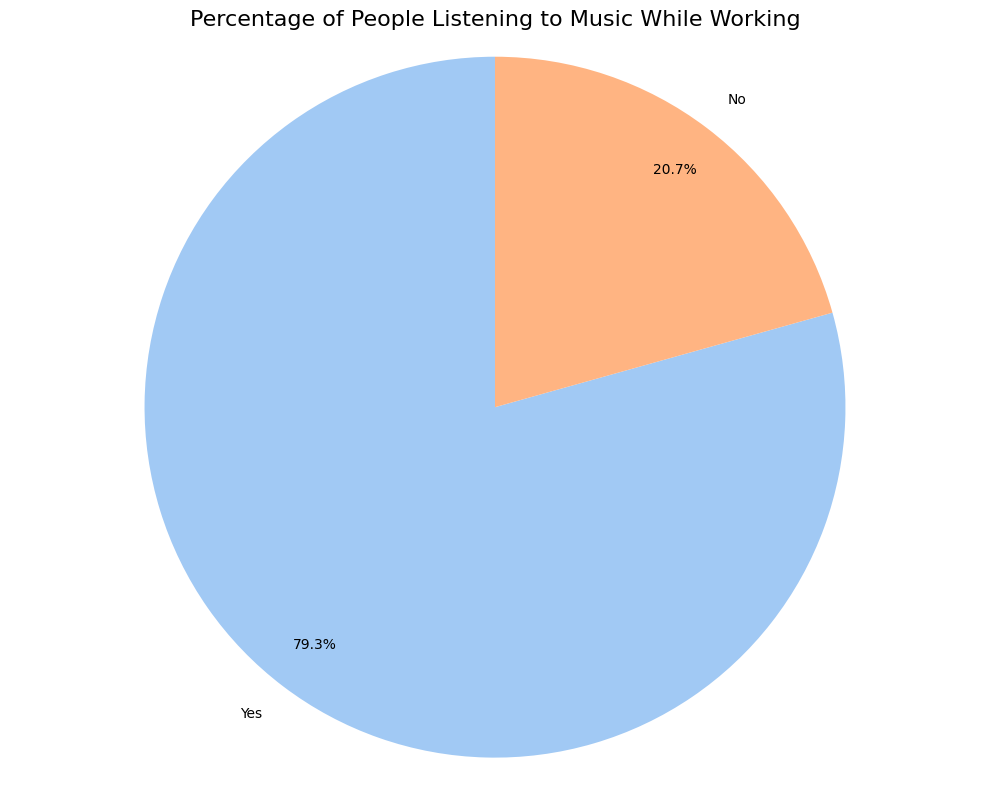

In [ ]:

# Pie chart for 'While working'
df_while_working = new_df['While working'].value_counts().reset_index()
plt.figure(figsize=(10, 8))
plt.pie(df_while_working['count'], labels=df_while_working['While working'],
        colors=palette_color, autopct='%.1f%%', startangle=90, pctdistance=0.85)
plt.title("Percentage of People Listening to Music While Working", fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

/tmp/ipython-input-506592582.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  music_effect_for_plotting = music_effect_for_plotting.replace(['No effect', 'Worsen'], 0.0)


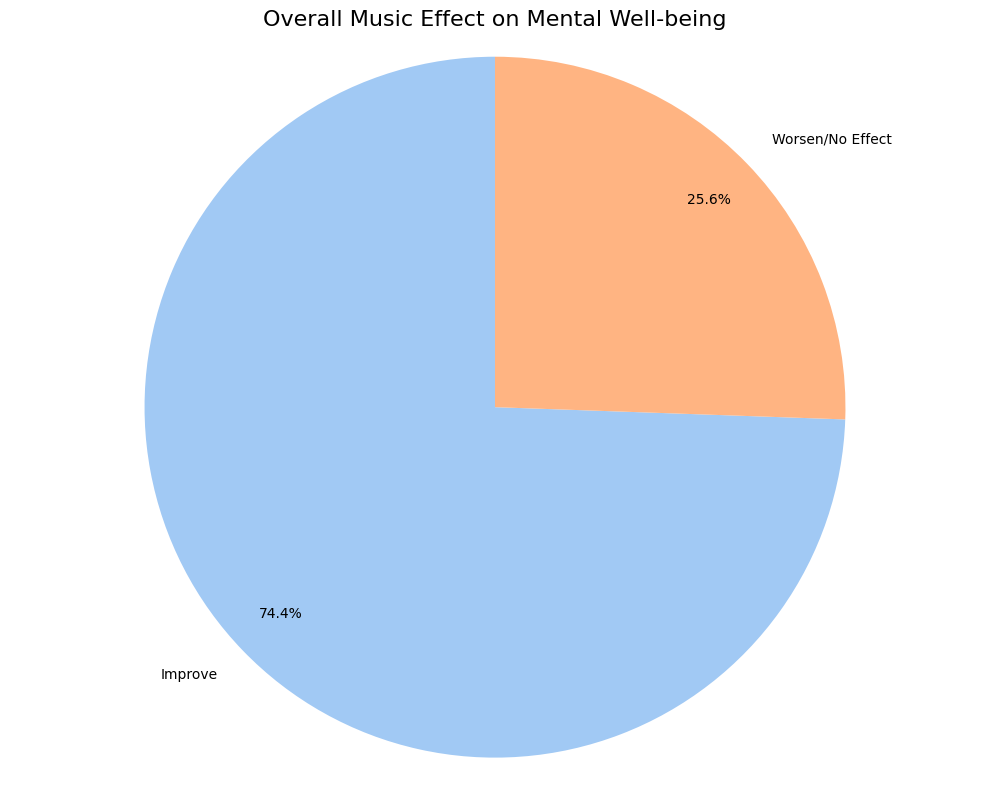

In [ ]:
# Pie chart for 'Music effects'
music_effect_for_plotting = new_df['Music effects'].copy()
# Map specific string values to numeric for plotting labels
music_effect_for_plotting = music_effect_for_plotting.replace('Improve', 1.0)
music_effect_for_plotting = music_effect_for_plotting.replace(['No effect', 'Worsen'], 0.0)
music_effect_for_plotting = pd.to_numeric(music_effect_for_plotting, errors='coerce')
music_effect_for_plotting = music_effect_for_plotting.replace({1.0: 'Improve', 0.0: 'Worsen/No Effect'})
music_effect_for_plotting = music_effect_for_plotting.dropna()

df_music_effect = music_effect_for_plotting.value_counts().reset_index()
plt.figure(figsize=(10, 8))
plt.pie(df_music_effect['count'], labels=df_music_effect['Music effects'],
        colors=palette_color, autopct='%.1f%%', startangle=90, pctdistance=0.85)
plt.title("Overall Music Effect on Mental Well-being", fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()


Music effects
Improve      501
No effect    155
Worsen        17
Name: count, dtype: int64
Music effects
Improve      74.442793
No effect    23.031204
Worsen        2.526003
Name: count, dtype: float64


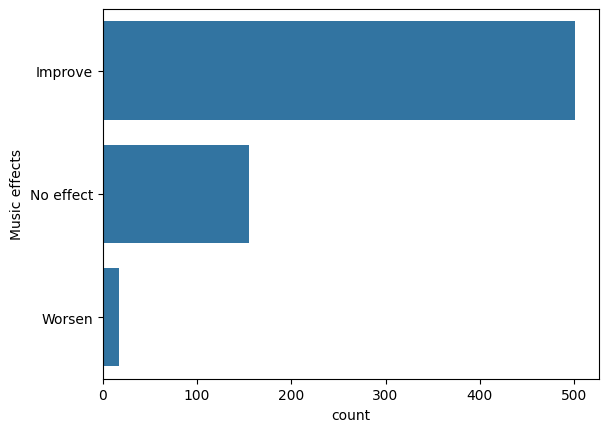

In [ ]:
#how many people said that their mood improved or worsened while listening to music
mood=sns.countplot(new_df["Music effects"])
mood_nums_1=new_df["Music effects"].value_counts()
print(mood_nums_1)
mood_nums=new_df["Music effects"].value_counts()/len(new_df)*100
print(mood_nums)

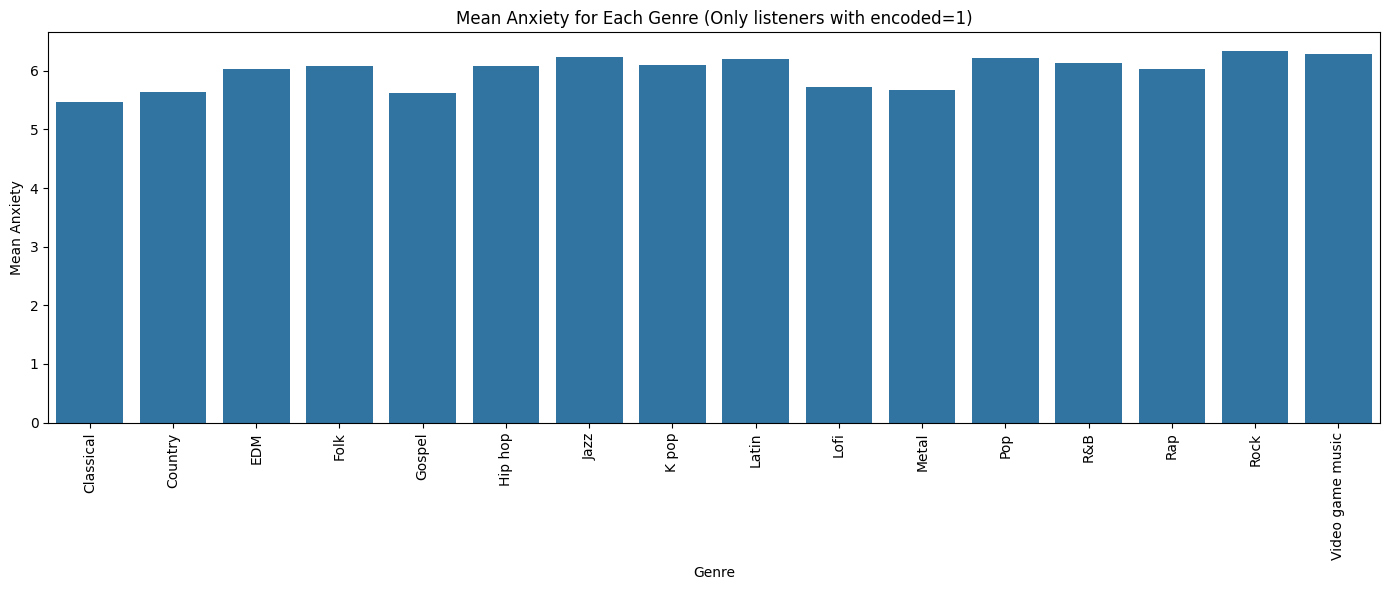

In [ ]:
# what about type of music that they listened to:
#match each mental illness with the weightage of the data provided for each genre
from sklearn.preprocessing import LabelEncoder


freq_genre = [
    'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]',
    'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]',
    'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]',
    'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
    'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]',
    'Frequency [Video game music]'
]

for col in freq_genre:

    # Create new column name
    new_col = col + "_encoded"

    # Custom mapping for label encoding
    new_df[new_col] = new_df[col].apply(lambda x: 0 if str(x).strip() in ['Rarely', 'Never', 'Sometimes'] else 1)


encoded_cols = [col + "_encoded" for col in freq_genre]

#ANXIETY

genre_anxiety = []

for original_col, enc_col in zip(freq_genre, encoded_cols):
    # select rows where the person listens (encoded = 1)
    subset = new_df[new_df[enc_col] == 1]

    # compute mean anxiety for this genre
    mean_anx = subset["Anxiety"].mean()

    # store results
    genre_anxiety.append({
        "Genre": original_col.replace("Frequency [","").replace("]",""),  # cleaner labels
        "Mean_Anxiety": mean_anx
    })

# convert to dataframe
plot_df = pd.DataFrame(genre_anxiety)

# --- PLOT ---
plt.figure(figsize=(14,6))
sns.barplot(data=plot_df, x="Genre", y="Mean_Anxiety")
plt.xticks(rotation=90)
plt.title("Mean Anxiety for Each Genre (Only listeners with encoded=1)")
plt.ylabel("Mean Anxiety")
plt.xlabel("Genre")
plt.tight_layout()
plt.show()





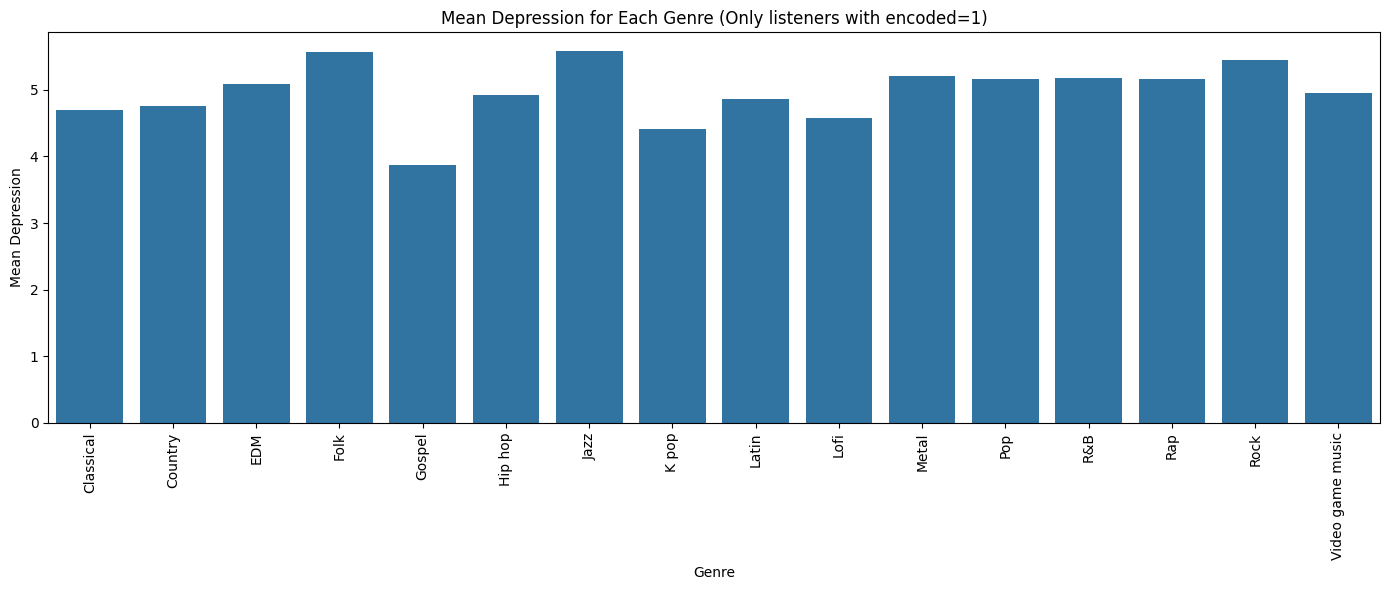

In [ ]:

#DEPRESSION

genre_dep = []

for original_col, enc_col in zip(freq_genre, encoded_cols):
    # select rows where the person listens (encoded = 1)
    subset = new_df[new_df[enc_col] == 1]

    # compute mean anxiety for this genre
    mean_anx = subset["Depression"].mean()

    # store results
    genre_dep.append({
        "Genre": original_col.replace("Frequency [","").replace("]",""),  # cleaner labels
        "Mean_Depression": mean_anx
    })

# convert to dataframe
plot_df = pd.DataFrame(genre_dep)

# --- PLOT ---
plt.figure(figsize=(14,6))
sns.barplot(data=plot_df, x="Genre", y="Mean_Depression")
plt.xticks(rotation=90)
plt.title("Mean Depression for Each Genre (Only listeners with encoded=1)")
plt.ylabel("Mean Depression")
plt.xlabel("Genre")
plt.tight_layout()
plt.show()


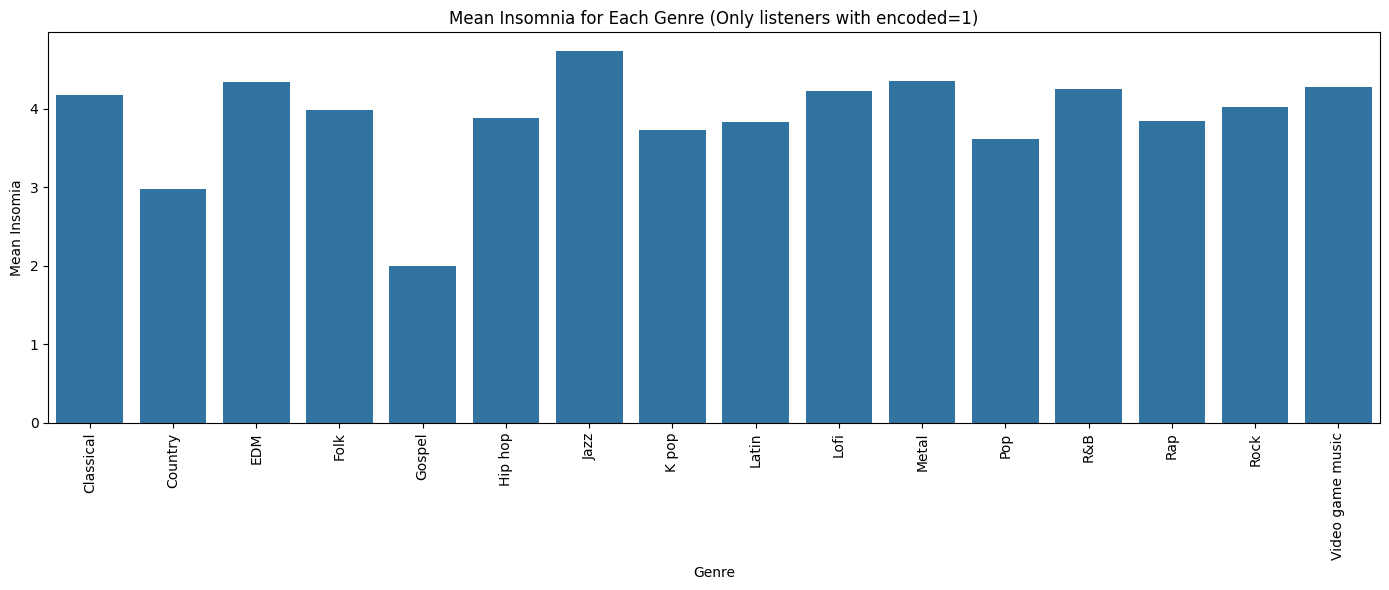

In [ ]:

#INSOMNIA

genre_dep = []

for original_col, enc_col in zip(freq_genre, encoded_cols):
    # select rows where the person listens (encoded = 1)
    subset = new_df[new_df[enc_col] == 1]

    # compute mean anxiety for this genre
    mean_ins = subset["Insomnia"].mean()

    # store results
    genre_dep.append({
        "Genre": original_col.replace("Frequency [","").replace("]",""),  # cleaner labels
        "Mean_Insomnia": mean_ins
    })

# convert to dataframe
plot_df = pd.DataFrame(genre_dep)

# --- PLOT ---
plt.figure(figsize=(14,6))
sns.barplot(data=plot_df, x="Genre", y="Mean_Insomnia")
plt.xticks(rotation=90)
plt.title("Mean Insomnia for Each Genre (Only listeners with encoded=1)")
plt.ylabel("Mean Insomia")
plt.xlabel("Genre")
plt.tight_layout()
plt.show()


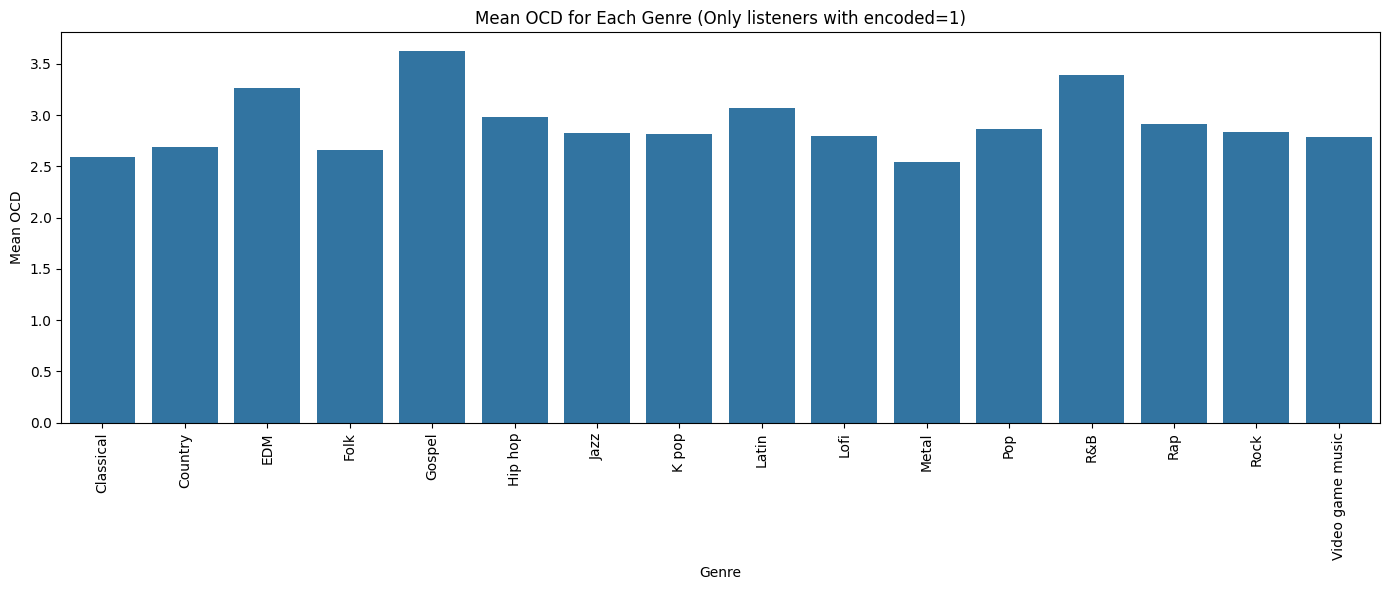

In [ ]:
#OCD

genre_dep = []

for original_col, enc_col in zip(freq_genre, encoded_cols):
    # select rows where the person listens (encoded = 1)
    subset = new_df[new_df[enc_col] == 1]

    # compute mean anxiety for this genre
    mean_O = subset["OCD"].mean()

    # store results
    genre_dep.append({
        "Genre": original_col.replace("Frequency [","").replace("]",""),  # cleaner labels
        "Mean_OCD": mean_O
    })

# convert to dataframe
plot_df = pd.DataFrame(genre_dep)

# --- PLOT ---
plt.figure(figsize=(14,6))
sns.barplot(data=plot_df, x="Genre", y="Mean_OCD")
plt.xticks(rotation=90)
plt.title("Mean OCD for Each Genre (Only listeners with encoded=1)")
plt.ylabel("Mean OCD")
plt.xlabel("Genre")
plt.tight_layout()
plt.show()

<Axes: xlabel='count', ylabel='Instrumentalist'>

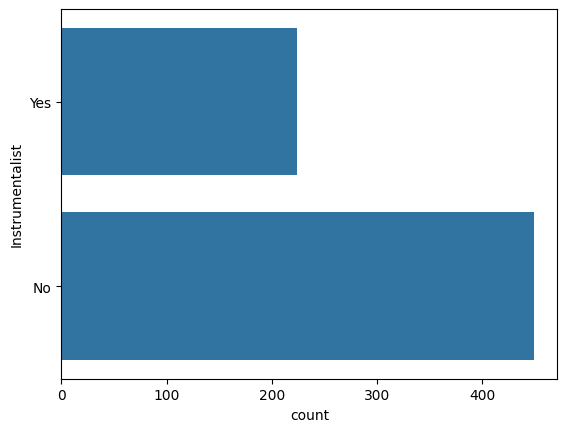

In [ ]:
#how many of the people are composers or play an instrument

#creating a count plot
sns.countplot(new_df['Instrumentalist'])

<Axes: xlabel='count', ylabel='Composer'>

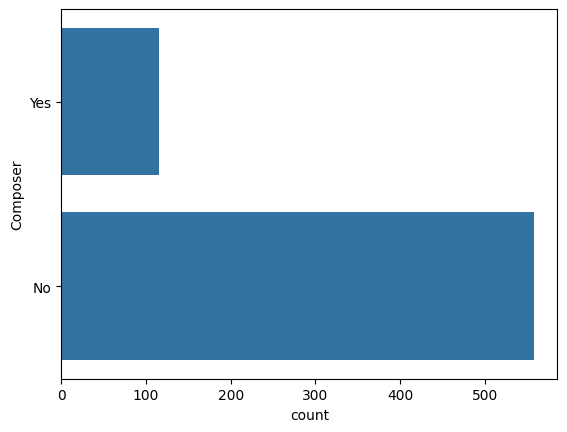

In [ ]:
sns.countplot(new_df['Composer'])

<Axes: xlabel='Age'>

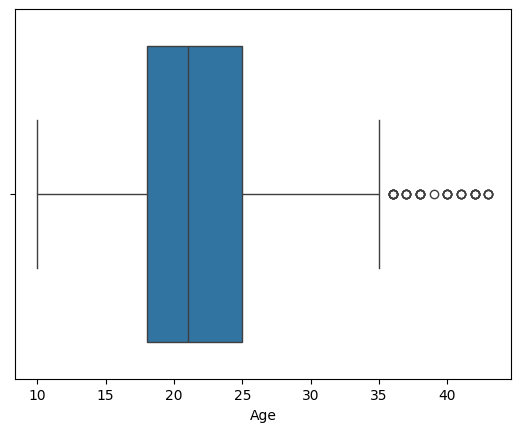

In [ ]:
sns.boxplot(x=new_df['Age'])

<Axes: xlabel='Composer', ylabel='Age'>

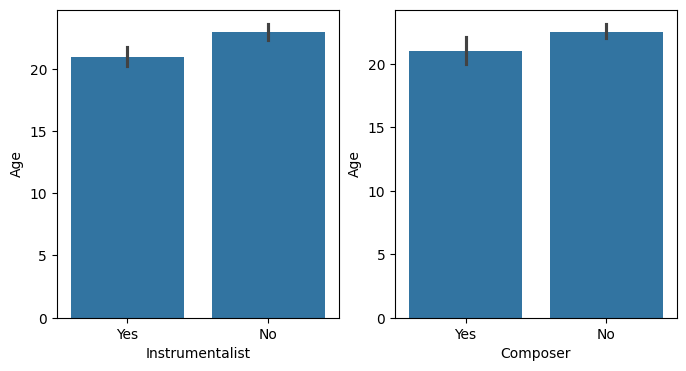

In [ ]:
#age group of all the peopple who tend to play and instrument or are composers
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.barplot(x=new_df['Instrumentalist'], y=new_df['Age'])

plt.subplot(1, 2, 2)
sns.barplot(x=new_df['Composer'], y=new_df['Age'])

<Axes: xlabel='Age', ylabel='Anxiety'>

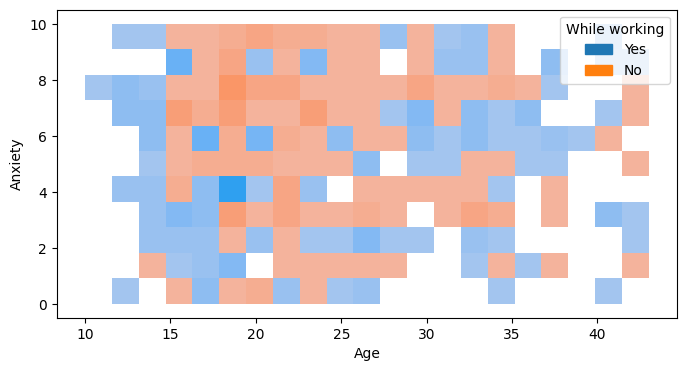

In [ ]:
#people that have reported to have been listening to songs while working and how it has affected their anxiety
#and what age group does it highlight the most

plt.figure(figsize=(8, 4))
sns.histplot(x=new_df['Age'], y=new_df['Anxiety'], hue=new_df['While working'])

<Axes: xlabel='Age', ylabel='Anxiety'>

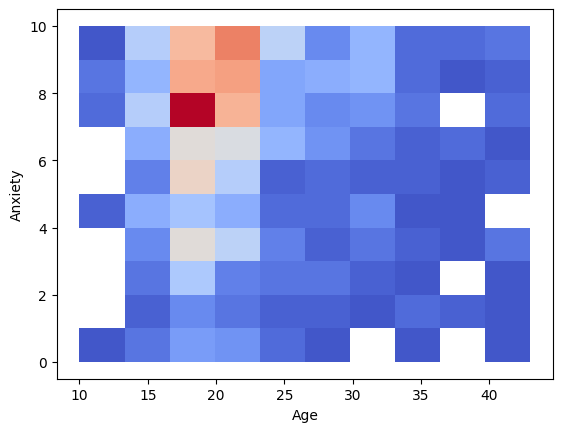

In [ ]:
#people of what age groups feel the most anxiety or depression

sns.histplot(x=df1_clean['Age'], y=df1_clean['Anxiety'], bins=10, cmap='coolwarm')

Prepare Data for Classification Model


In [ ]:

new_df['Music effects'] = new_df['Music effects'].replace('Improve', 1.0)

new_df['Music effects'] = new_df['Music effects'].replace(['No effect', 'Worsen'], 0.0)

new_df['Music effects'] = pd.to_numeric(new_df['Music effects'], errors='coerce')

df_cleaned = new_df.dropna(subset=['Music effects']).copy()

y = df_cleaned['Music effects']
one_hot_encoded_genres_columns = df_cleaned.filter(like='Fav genre_').columns
X = df_cleaned[[ 'Anxiety', 'Depression', 'Insomnia', 'OCD'] + list(one_hot_encoded_genres_columns)]

print("\n'Music effects' value counts after cleaning for modeling")
print(y.value_counts())

if X.empty or y.empty:
    print(f"Error: X (shape {X.shape}) or y (shape {y.shape}) are empty after handling missing 'Music effects' values.")
    print("This means all rows were likely dropped. Please check the 'Music effects' column in your CSV for unexpected values.")
    exit()

if y.nunique() < 2:
    print(f"Error: The target variable 'Music effects' contains only one unique class ({y.unique()}) after cleaning.")
    print("Cannot perform classification with only one class. Please check your data and cleaning steps.")
    exit()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


'Music effects' value counts after cleaning for modeling
Music effects
1.0    501
0.0    172
Name: count, dtype: int64
X_train shape: (538, 4), y_train shape: (538,)
X_test shape: (135, 4), y_test shape: (135,)


/tmp/ipython-input-2121226116.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df['Music effects'] = new_df['Music effects'].replace(['No effect', 'Worsen'], 0.0)


Training and Evaluating Classifiers



Training Logistic Regression...
Confusion matrix for Logistic Regression:
[[  0  35]
 [  0 100]]
Logistic Regression Accuracy: 74.07%
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        35
         1.0       0.74      1.00      0.85       100

    accuracy                           0.74       135
   macro avg       0.37      0.50      0.43       135
weighted avg       0.55      0.74      0.63       135



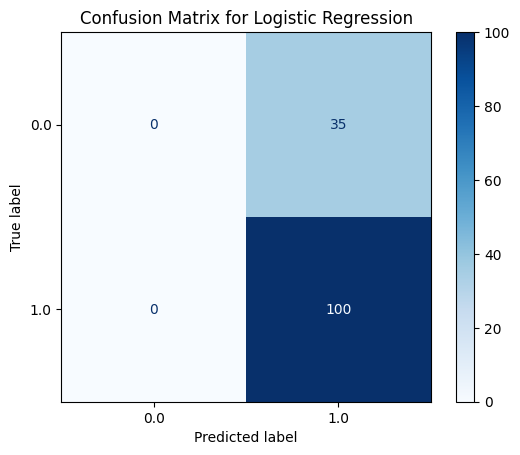


Training Decision Tree...
Confusion matrix for Decision Tree:
[[12 23]
 [20 80]]
Decision Tree Accuracy: 68.15%
              precision    recall  f1-score   support

         0.0       0.38      0.34      0.36        35
         1.0       0.78      0.80      0.79       100

    accuracy                           0.68       135
   macro avg       0.58      0.57      0.57       135
weighted avg       0.67      0.68      0.68       135



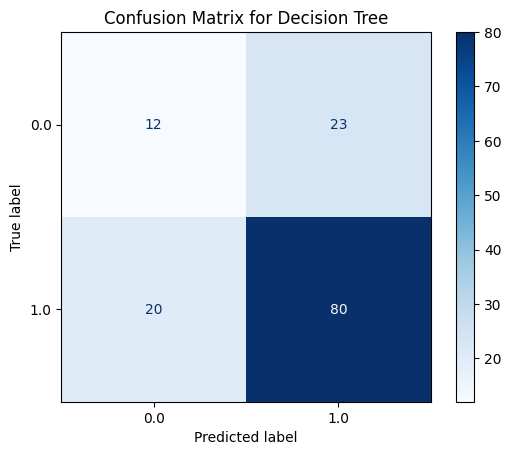


Training Random Forest...
Confusion matrix for Random Forest:
[[ 9 26]
 [10 90]]
Random Forest Accuracy: 73.33%
              precision    recall  f1-score   support

         0.0       0.47      0.26      0.33        35
         1.0       0.78      0.90      0.83       100

    accuracy                           0.73       135
   macro avg       0.62      0.58      0.58       135
weighted avg       0.70      0.73      0.70       135



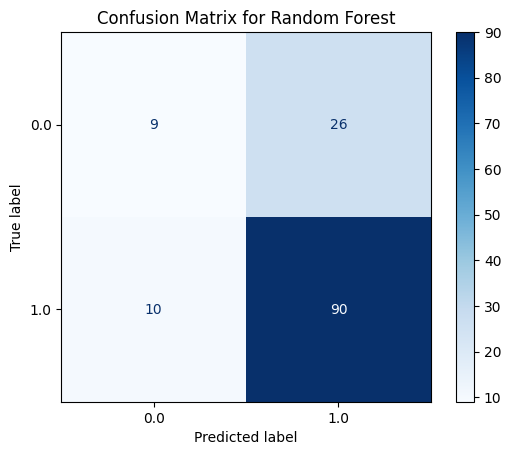

In [ ]:
results = {}
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='liblinear'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
}

for name, clf in classifiers.items():
    print(f"\nTraining {name}...")
    try:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        cm = confusion_matrix(y_test, y_pred)
        print(f"Confusion matrix for {name}:\n{cm}")

        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy
        print(f"{name} Accuracy: {accuracy*100:.2f}%")

        report = classification_report(y_test, y_pred, zero_division=0)
        print(report)

        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
        disp.plot(cmap='Blues')
        plt.title(f'Confusion Matrix for {name}')
        plt.show()

    except Exception as e:
        print(f"Error training/evaluating {name}: {e}")


**optimised logistic regression**

Starting Grid Search for Logistic Regression...
Fitting 5 folds for each of 160 candidates, totalling 800 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
325 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_sol


Best Hyperparameters for Logistic Regression:
{'C': 0.01, 'l1_ratio': None, 'penalty': 'l1', 'solver': 'saga'}
Best CV Accuracy from Grid Search: 0.7454

Optimized Logistic Regression Test Accuracy: 74.07%

Classification Report for Optimized Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        35
         1.0       0.74      1.00      0.85       100

    accuracy                           0.74       135
   macro avg       0.37      0.50      0.43       135
weighted avg       0.55      0.74      0.63       135

Confusion Matrix for Optimized Logistic Regression:
[[  0  35]
 [  0 100]]


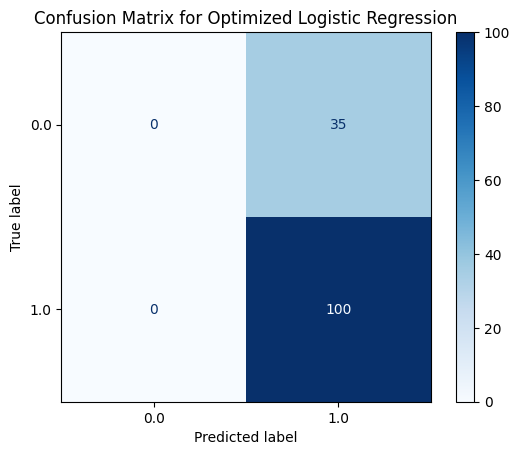


Logistic Regression Cross-Validation Scores: [0.75       0.74074074 0.74074074 0.74766355 0.74766355]
Average Logistic Regression CV Score: 0.7454

Optimized Logistic Regression Precision (weighted): 0.5487
Optimized Logistic Regression F1-Score (weighted): 0.6304


In [ ]:

log_reg = LogisticRegression(random_state=42, max_iter=2000)

param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # type of regularization
    'C': [0.01, 0.1, 1, 10, 100],                   # inverse regularization strength
    'solver': ['liblinear', 'saga'],                # solvers supporting L1/elasticnet
    'l1_ratio': [None, 0.3, 0.5, 0.7]               # used only for elasticnet
}

grid_search_lr = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid_lr,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)

print("Starting Grid Search for Logistic Regression...")
grid_search_lr.fit(X_train, y_train)

best_lr_model = grid_search_lr.best_estimator_
print("\nBest Hyperparameters for Logistic Regression:")
print(grid_search_lr.best_params_)
print(f"Best CV Accuracy from Grid Search: {grid_search_lr.best_score_:.4f}")

# Test performance
y_pred_lr_optimized = best_lr_model.predict(X_test)

test_accuracy_lr = accuracy_score(y_test, y_pred_lr_optimized)
print(f"\nOptimized Logistic Regression Test Accuracy: {test_accuracy_lr * 100:.2f}%")

print("\nClassification Report for Optimized Logistic Regression:")
print(classification_report(y_test, y_pred_lr_optimized, zero_division=0))

cm_lr_optimized = confusion_matrix(y_test, y_pred_lr_optimized)
print("Confusion Matrix for Optimized Logistic Regression:")
print(cm_lr_optimized)

disp_lr_opt = ConfusionMatrixDisplay(
    confusion_matrix=cm_lr_optimized,
    display_labels=best_lr_model.classes_
)
disp_lr_opt.plot(cmap='Blues')
plt.title('Confusion Matrix for Optimized Logistic Regression')
plt.show()

# Cross-validation on training set
cv_scores_lr = cross_val_score(best_lr_model, X_train, y_train, cv=5)
print(f"\nLogistic Regression Cross-Validation Scores: {cv_scores_lr}")
print(f"Average Logistic Regression CV Score: {cv_scores_lr.mean():.4f}")

precision_lr = precision_score(y_test, y_pred_lr_optimized, average='weighted', zero_division=0)
f1_lr = f1_score(y_test, y_pred_lr_optimized, average='weighted', zero_division=0)
print(f"\nOptimized Logistic Regression Precision (weighted): {precision_lr:.4f}")
print(f"Optimized Logistic Regression F1-Score (weighted): {f1_lr:.4f}")
